<a href="https://colab.research.google.com/github/Dhanvi0206/EDUNET_project/blob/main/analyzing_health_predictors_for_diabetes_in_pima_indian_women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021559  0.231128       0.281199       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.02155

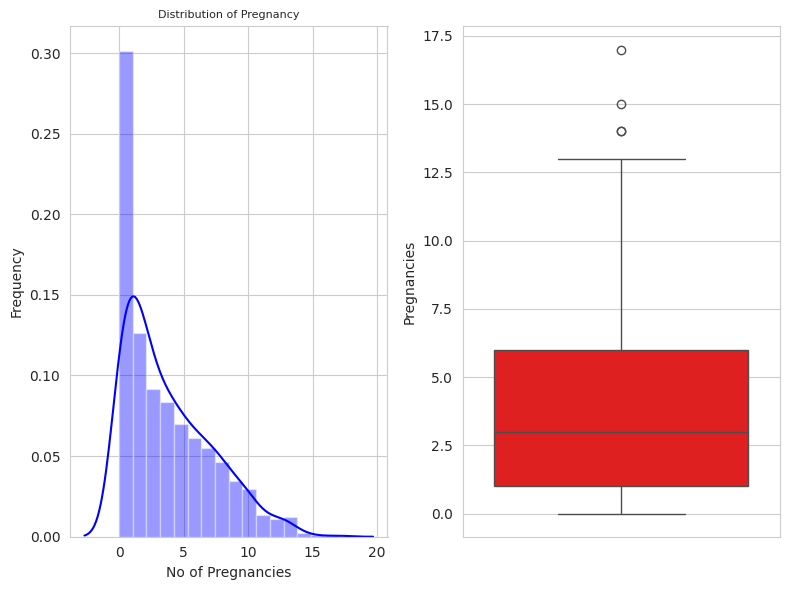

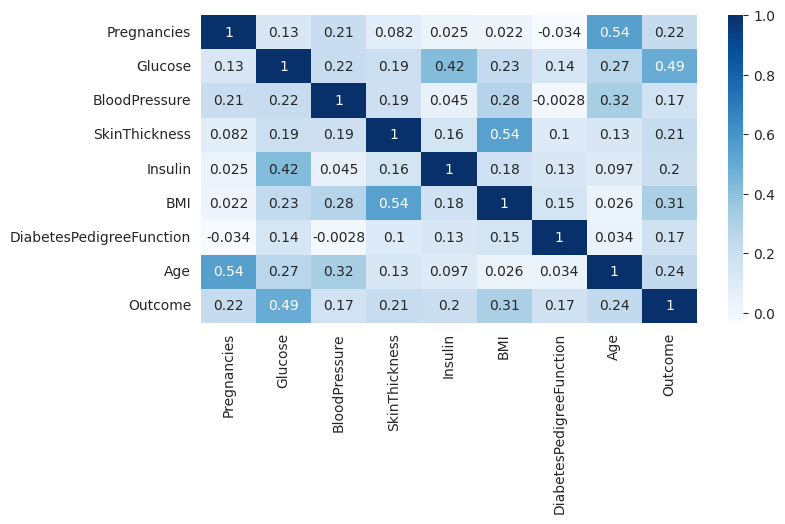

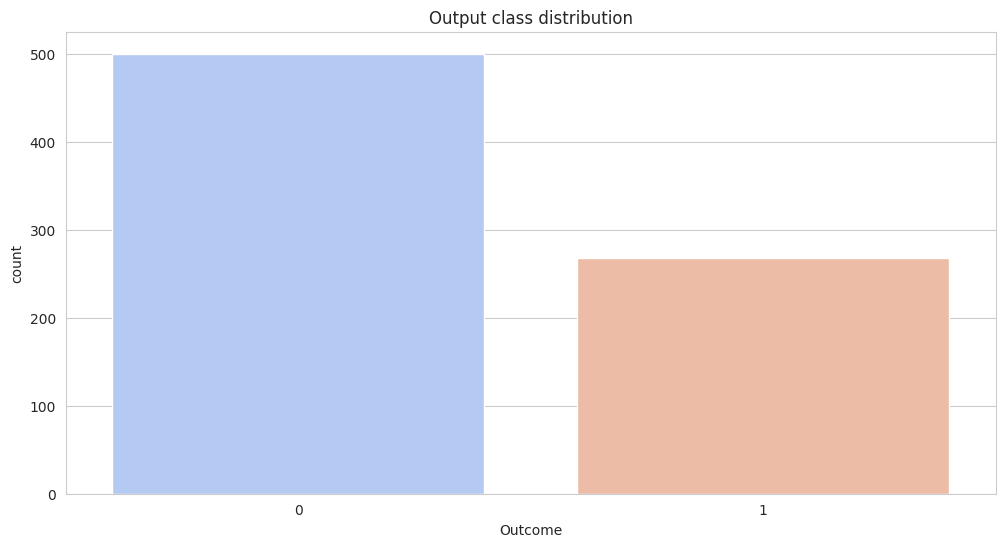

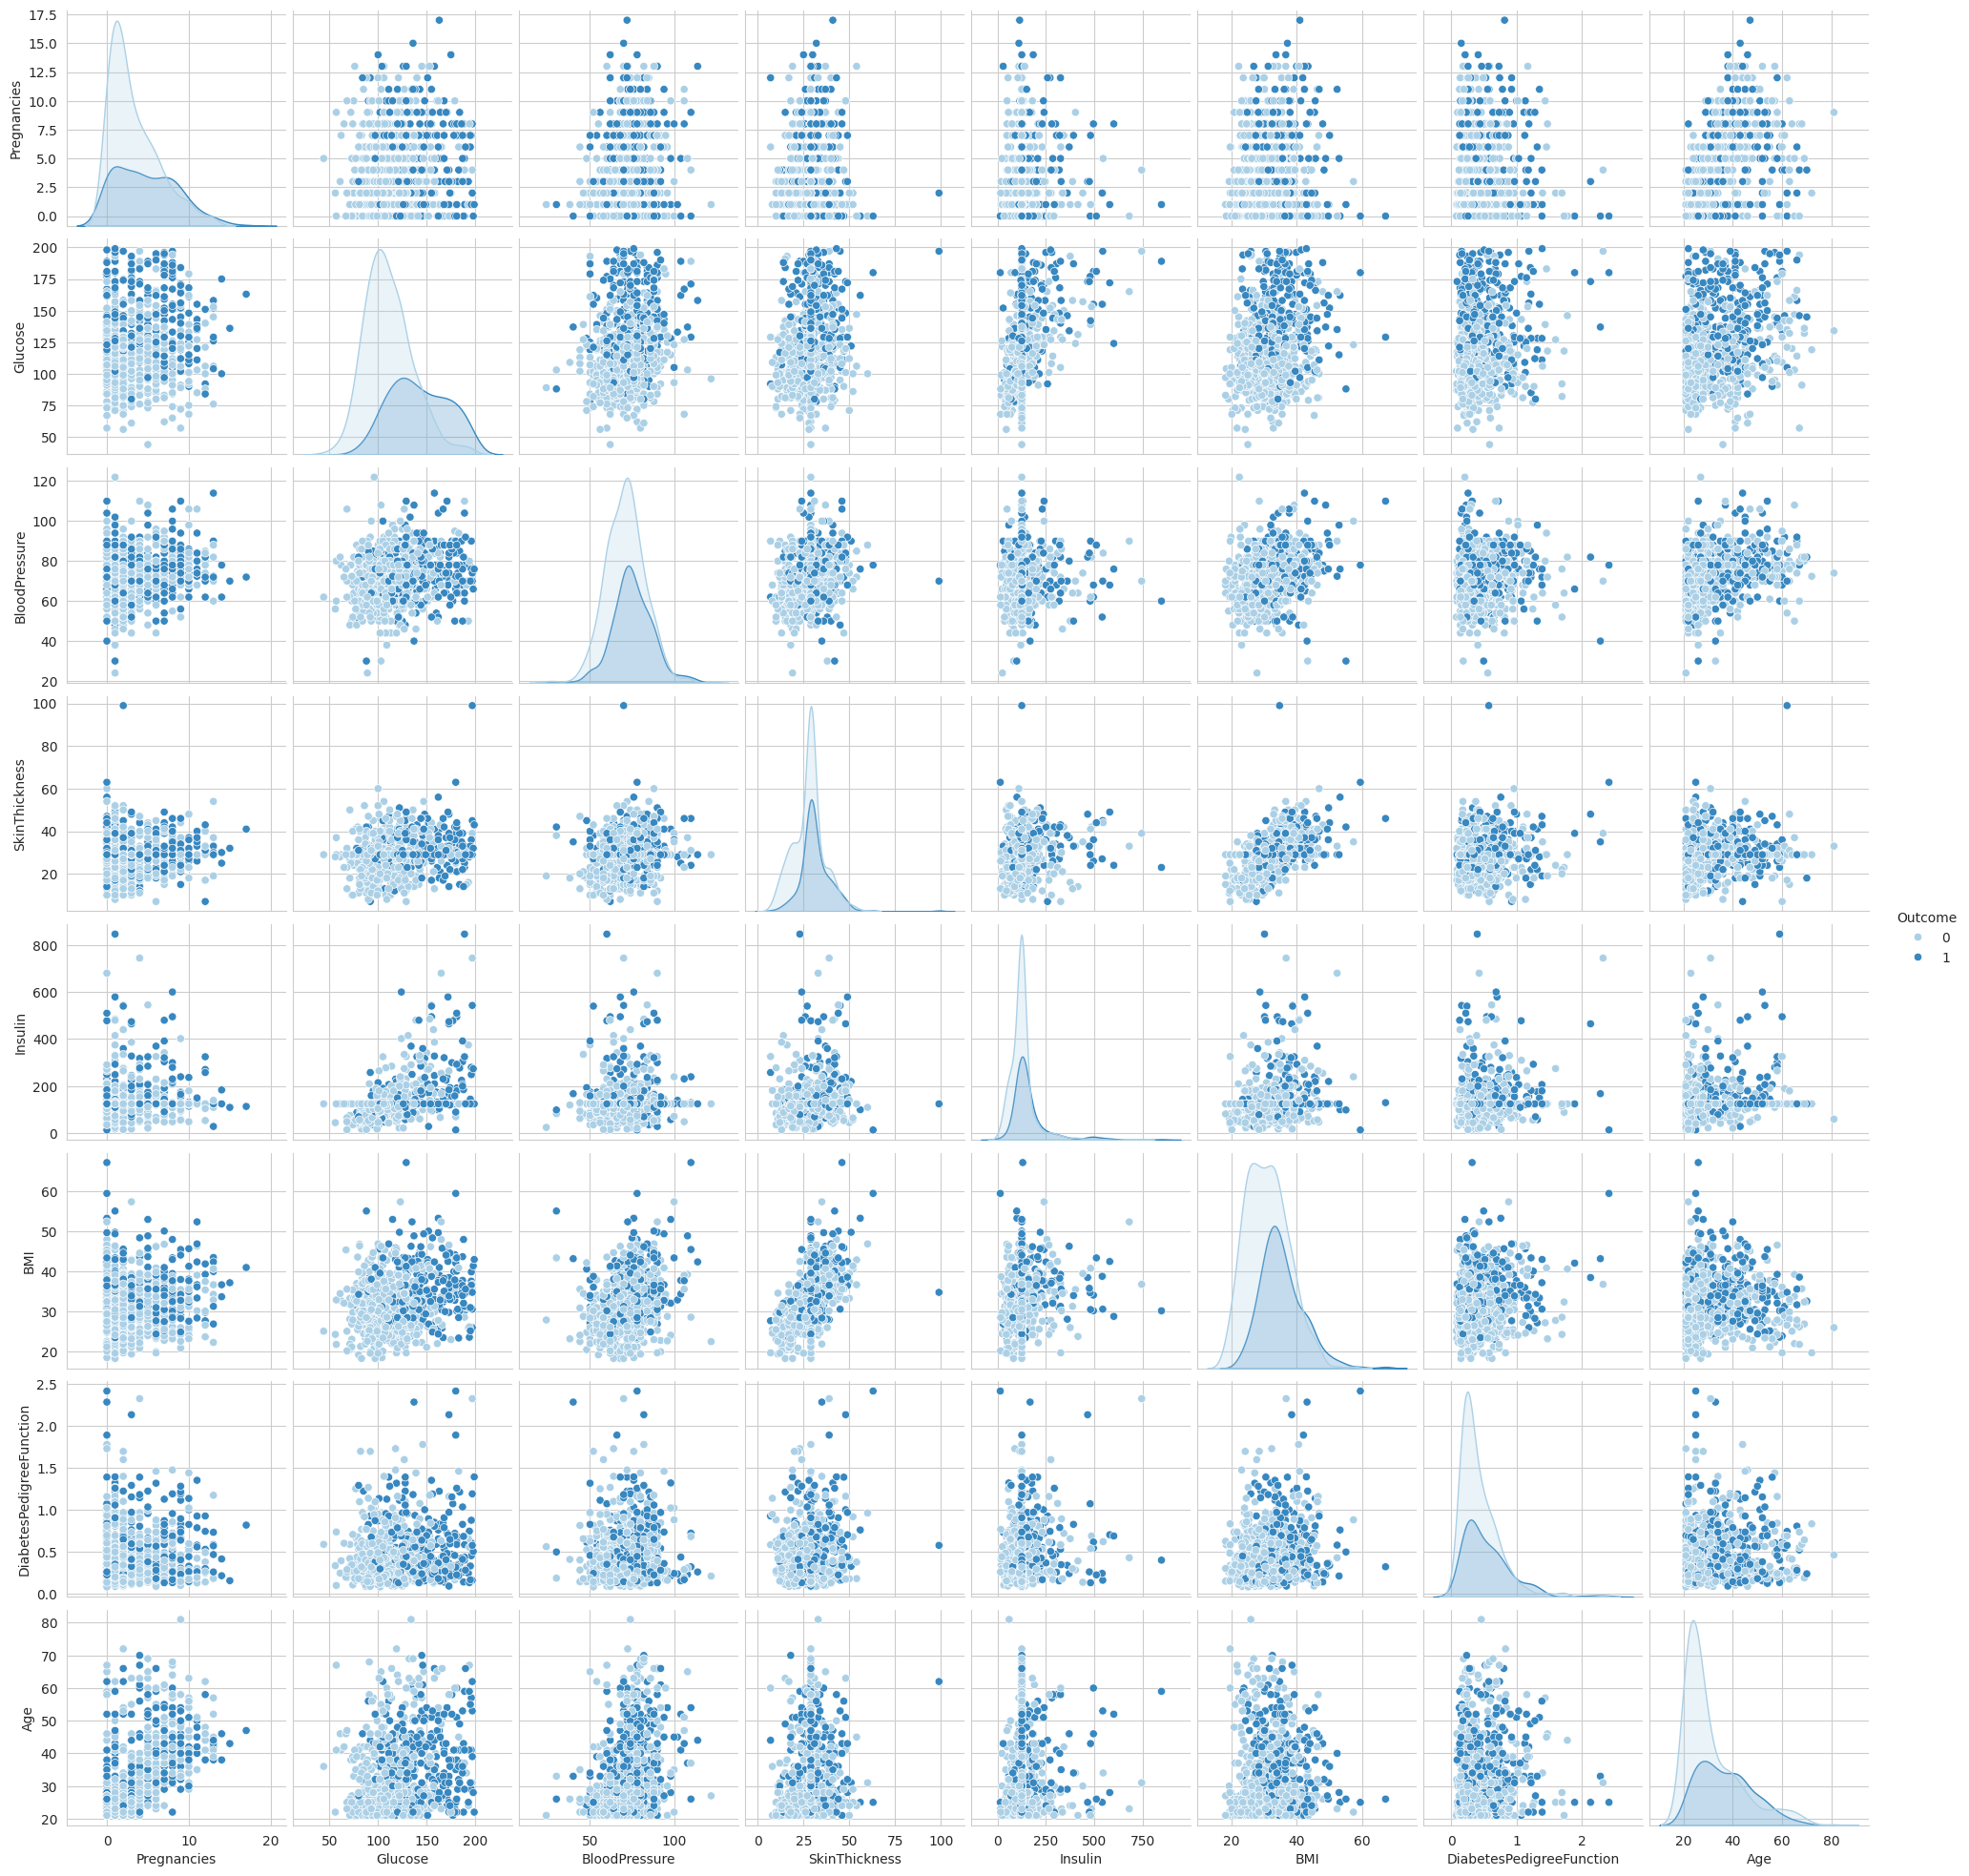

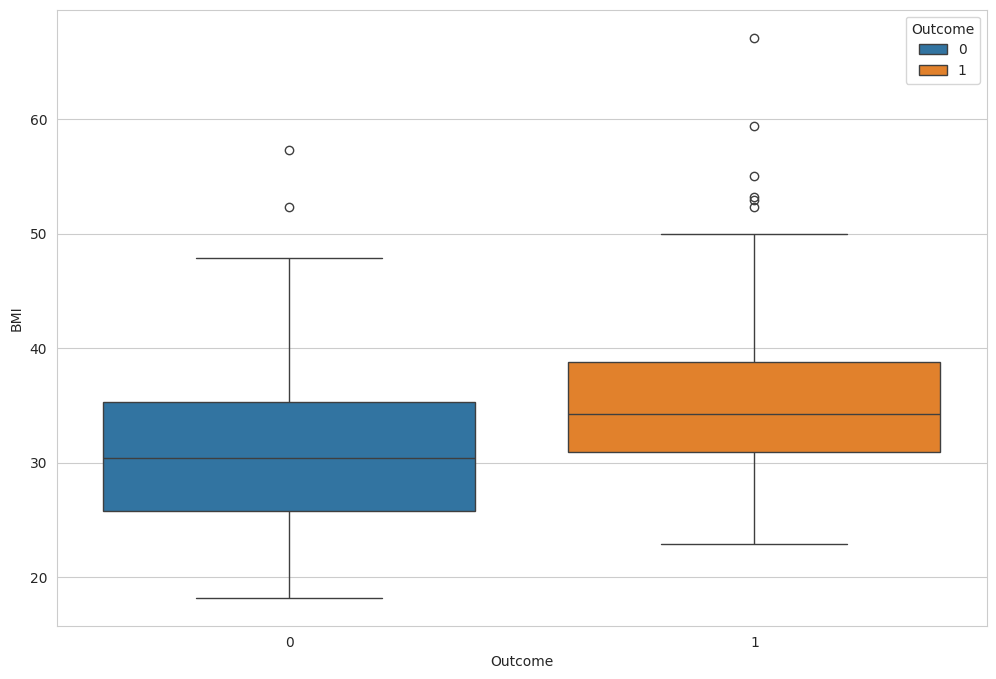

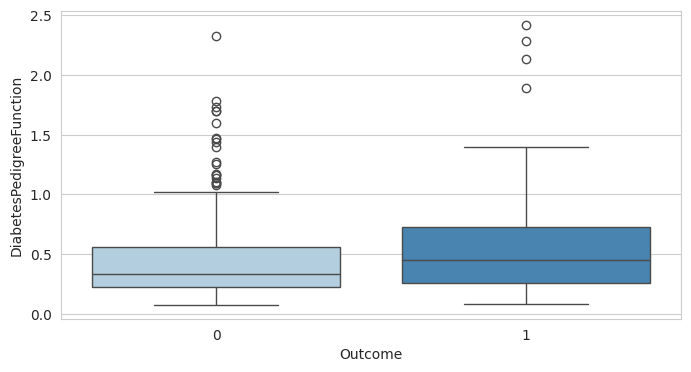

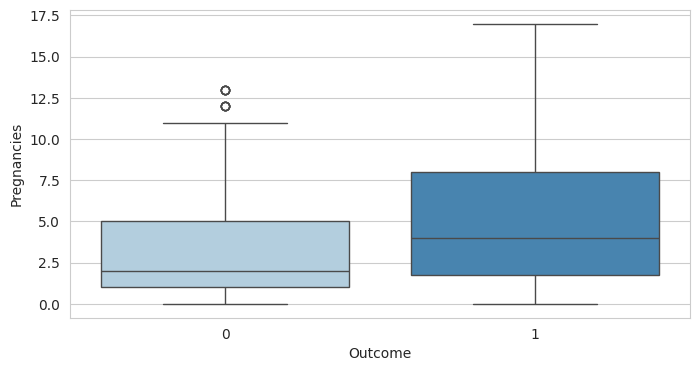

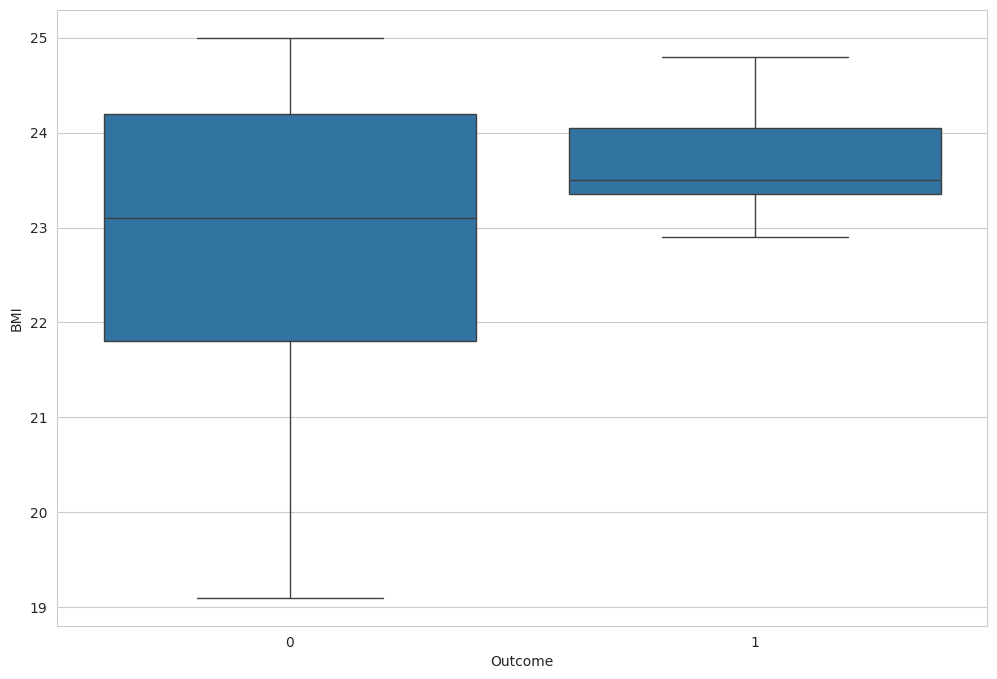

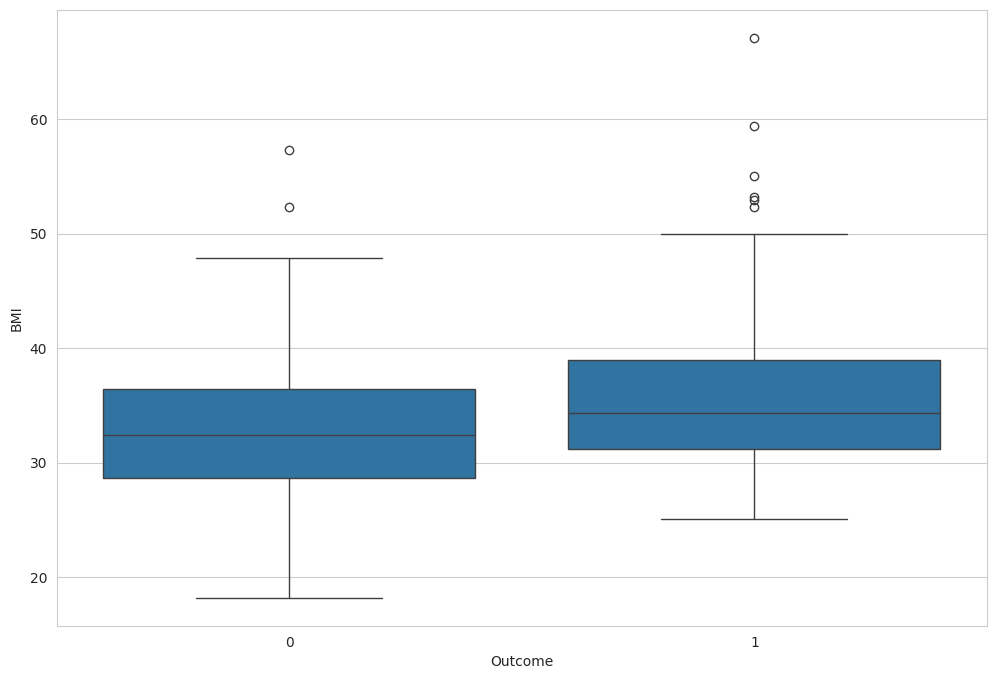

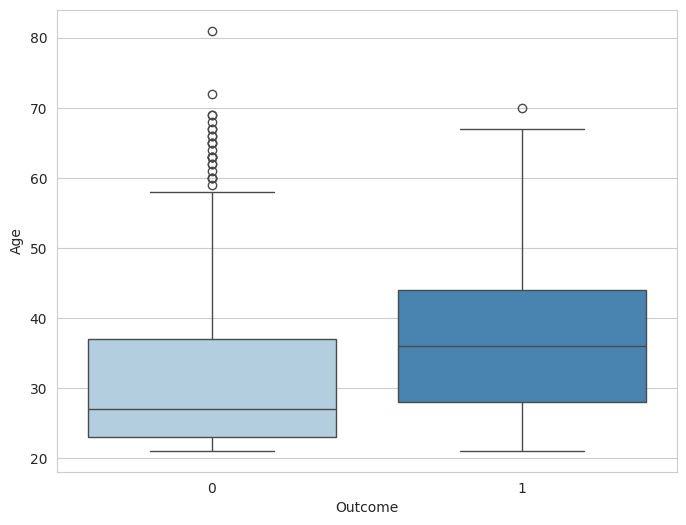

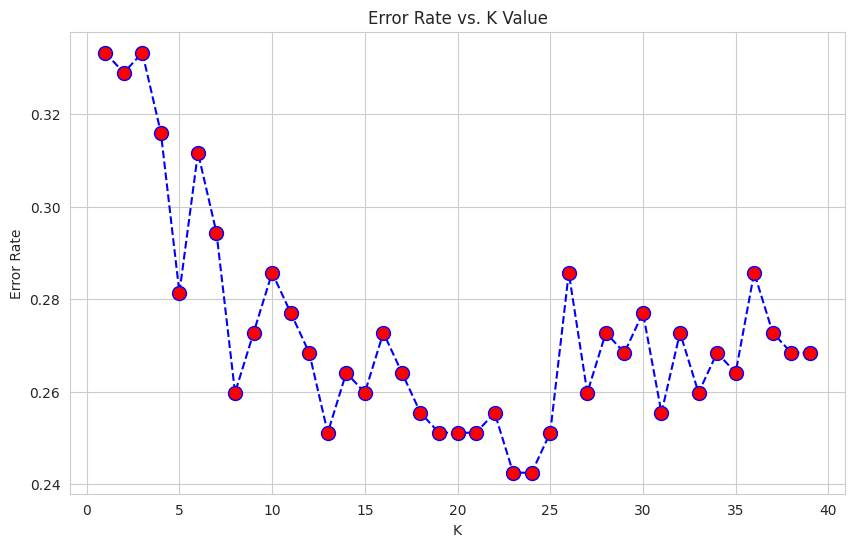


Max train score 100.0 % and k = [1]

Max test score 75.75757575757575 % and k = [23, 24]

Max train score 100.0 % and k = [1]

Max test score 75.75757575757575 % and k = [23, 24]
Accuracy on original data: 0.696969696969697
Accuracy on MinMax-scaled data: 0.7359307359307359


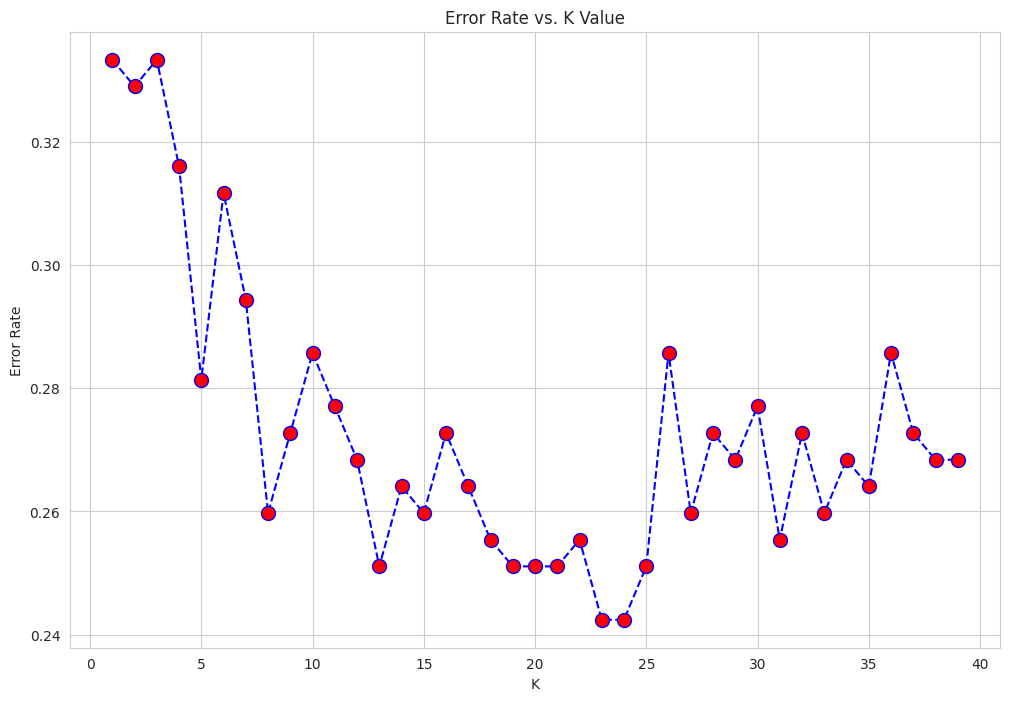

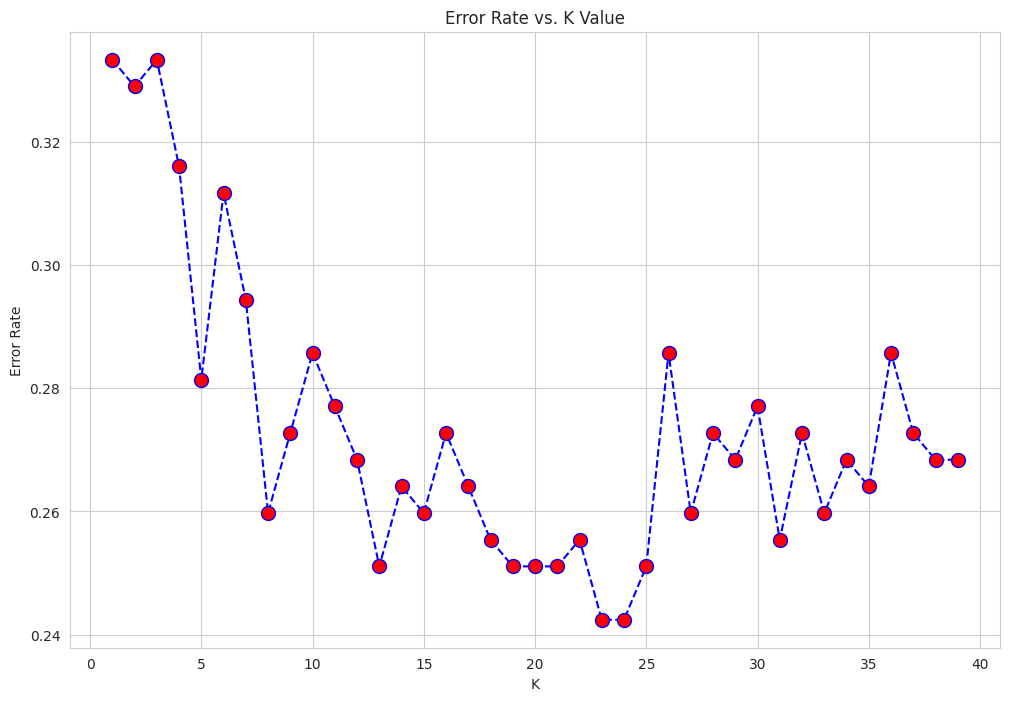

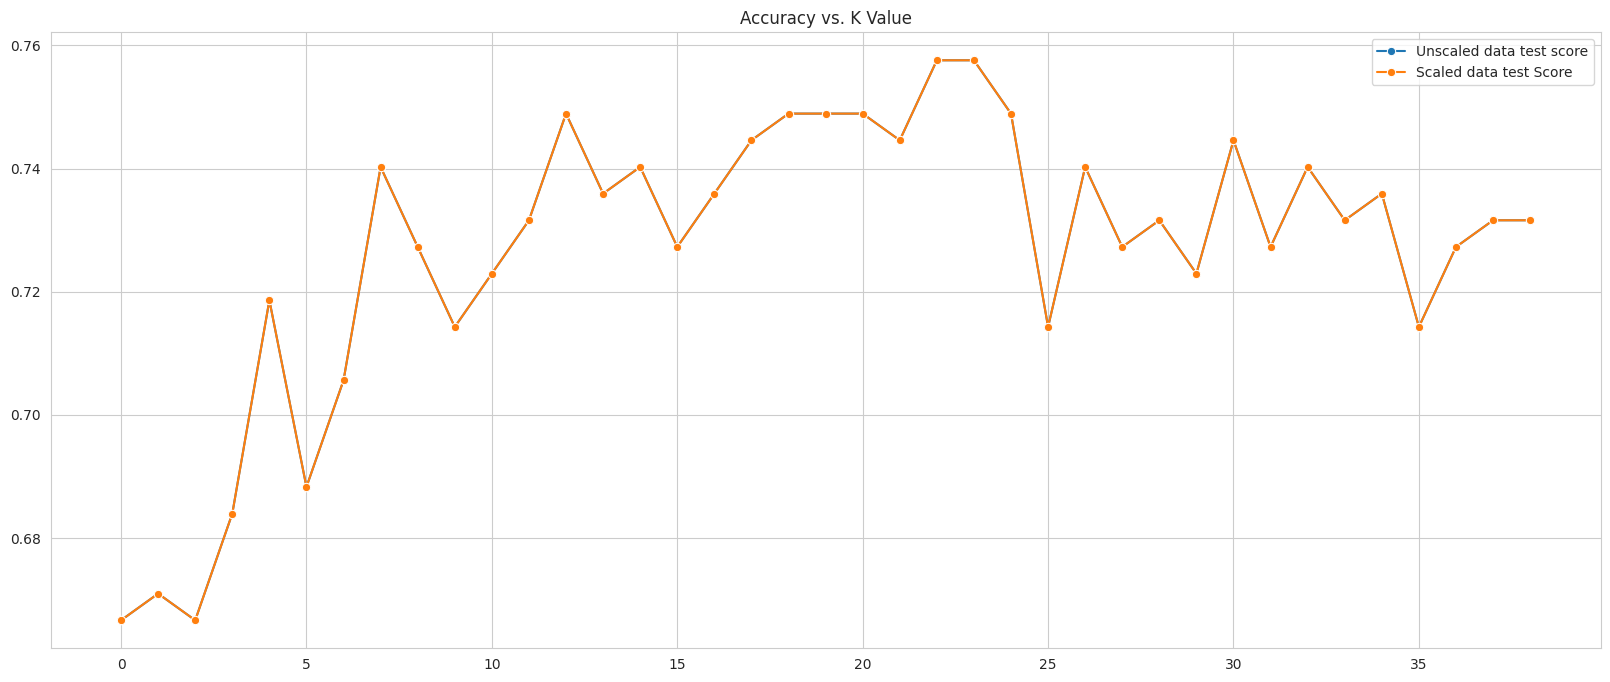

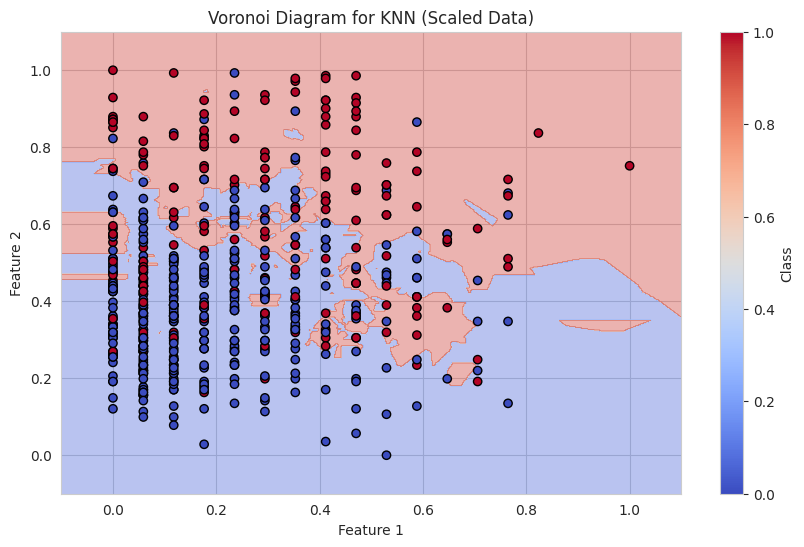

Cross-validation scores on original data: [0.67532468 0.73376623 0.68831169 0.73856209 0.69934641]
Mean cross-validation accuracy on original data: 0.7070622188269248
Cross-validation scores on MinMax-scaled data: [0.74025974 0.71428571 0.76623377 0.75163399 0.74509804]
Mean cross-validation accuracy on MinMax-scaled data: 0.7435022493846024


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()
diabetes_data = pd.read_csv("/content/preprocessed_diabetes_data.csv")
diabetes_data.head(10)
diabetes_data.shape
diabetes_data.describe().T
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))
plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()
plot01=sns.boxplot(data=diabetes_data['Pregnancies'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()
correlation_matrix=diabetes_data.corr();
print(correlation_matrix)
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='coolwarm')
plt.title("Output class distribution")
print(diabetes_data['Outcome'].value_counts())
sns.pairplot(diabetes_data,hue='Outcome',palette='Blues')
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')
plt.figure(figsize=(8,4))
sns.boxplot(y='DiabetesPedigreeFunction',x='Outcome',data=diabetes_data,palette='Blues')
plt.figure(figsize=(8,4))
sns.boxplot(y='Pregnancies',x='Outcome',data=diabetes_data,palette='Blues')
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=normalBMIData)
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)
plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome',y='Age',data=diabetes_data,palette='Blues')
unchanged_data = diabetes_data.drop('Outcome',axis=1)
unchanged_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(diabetes_data.drop('Outcome',axis=1))
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def plot_KNN_error_rate(scaled_data, outcome):
    """
    Plots the error rate for KNN models with varying k values.
    """

    X_train, X_test, y_train, y_test = train_test_split(scaled_data, outcome, test_size=0.3, random_state=42)

    error_rate = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

    return error_rate
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])
def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []
  X_train, X_test, y_train, y_test = train_test_split(scaled_data, ydata, test_size=0.3, random_state=42)

  for i in range(1,40):

      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()

  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()

  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(diabetes_data.drop('Outcome',axis=1))
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))


df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy on original data:", accuracy_original)
print("Accuracy on MinMax-scaled data:", accuracy_scaled)
X_train_voronoi = X_train_scaled[:, :2]
knn_voronoi = KNeighborsClassifier(n_neighbors=5)
knn_voronoi.fit(X_train_voronoi, y_train)

x_min, x_max = X_train_voronoi[:, 0].min() - 0.1, X_train_voronoi[:, 0].max() + 0.1
y_min, y_max = X_train_voronoi[:, 1].min() - 0.1, X_train_voronoi[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = knn_voronoi.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train_voronoi[:, 0], X_train_voronoi[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
plt.title('Voronoi Diagram for KNN (Scaled Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_original = cross_val_score(knn_original, X, y, cv=kf)
print("Cross-validation scores on original data:", cv_scores_original)
print("Mean cross-validation accuracy on original data:", cv_scores_original.mean())

cv_scores_scaled = cross_val_score(knn_scaled, scaler.fit_transform(X), y, cv=kf)
print("Cross-validation scores on MinMax-scaled data:", cv_scores_scaled)
print("Mean cross-validation accuracy on MinMax-scaled data:", cv_scores_scaled.mean())